In [ ]:
from sklearn.mixture import BayesianGaussianMixture

import os
import torch
import numpy as np
from collections import defaultdict
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
import kmeans


In [7]:
emb_dir = "../embeddings/merged_embeddings.npy"
embeddings = np.load(emb_dir)
print(f"Loaded embeddings of shape: {embeddings.shape}")

emb_dir = "../embeddings/local_embeddings.npy"
embeddings_local = np.load(emb_dir)
print(f"Loaded embeddings of shape: {embeddings_local.shape}")


emb_dir = "../embeddings/global_embeddings.npy"
embeddings_glob = np.load(emb_dir)
print(f"Loaded embeddings of shape: {embeddings_glob.shape}")


name_dir = "../embeddings/names_embeddings.npy"
if not os.path.exists(name_dir):
    raise FileNotFoundError(f"Embeddings file not found at {name_dir}")
names = np.load(name_dir)
print(f"Loaded names of shape: {names.shape}")
artist_arr = deepcopy(names)

for i in range(names.shape[0]):
    artist_arr[i] = artist_arr[i].split("_")[0]

Loaded embeddings of shape: (8739, 1344)
Loaded embeddings of shape: (8739, 320)
Loaded embeddings of shape: (8739, 1024)
Loaded names of shape: (8739,)


In [3]:
def painter_probabilities(artist, names, painting_probs):
    painter_probs = np.zeros(painting_probs.shape[1])
    cou = 0
    for i in range(len(names)):
        if names[i] == artist:
            painter_probs += painting_probs[i]
            cou += 1
    return painter_probs/cou

In [4]:
bgmm = BayesianGaussianMixture(n_components=80, covariance_type='full')
bgmm.fit(embeddings)

BayesianGaussianMixture(n_components=80)

In [5]:
bgmm_local = BayesianGaussianMixture(n_components=80, covariance_type='full')
bgmm_local.fit(embeddings_local)

BayesianGaussianMixture(n_components=80)

In [ ]:
bgmm_glob = (n_components=50, covariance_type='full')
bgmm_glob.fit(embeddings_glob)

BayesianGaussianMixture(n_components=50)

In [32]:
# After fitting:
weights = bgmm_glob.weights_

# You can count components with significant weight
threshold = 1e-4  # You can adjust this threshold
active_components = np.sum(weights > threshold)

print(f"Number of active clusters (weights > {threshold}): {active_components}")

Number of active clusters (weights > 0.0001): 12


In [25]:
painting_probs = bgmm.predict_proba(embeddings)
painting_probs_local = bgmm_local.predict_proba(embeddings_local)
painting_probs_glob = bgmm_glob.predict_proba(embeddings_glob)

In [14]:
def matrix_prob(painting_prob, painters):
    painter_prob = []
    for painter in painters:
        painter_prob.append(painter_probabilities(painter, artist_arr, painting_probs))
    return np.array(painter_prob)

In [16]:
painters = np.unique(artist_arr)

In [26]:
painter_prob = matrix_prob(painting_probs, painters)
painter_prob_local = matrix_prob(painting_probs_local, painters)
painter_prob_glob = matrix_prob(painting_probs_glob, painters)
print(f"Painter probabilities shape: {painter_prob.shape}")
print(f"Painter probabilities local shape: {painter_prob_local.shape}")
print(f"Painter probabilities global shape: {painter_prob_glob.shape}")

Painter probabilities shape: (316, 80)
Painter probabilities local shape: (316, 80)
Painter probabilities global shape: (316, 80)


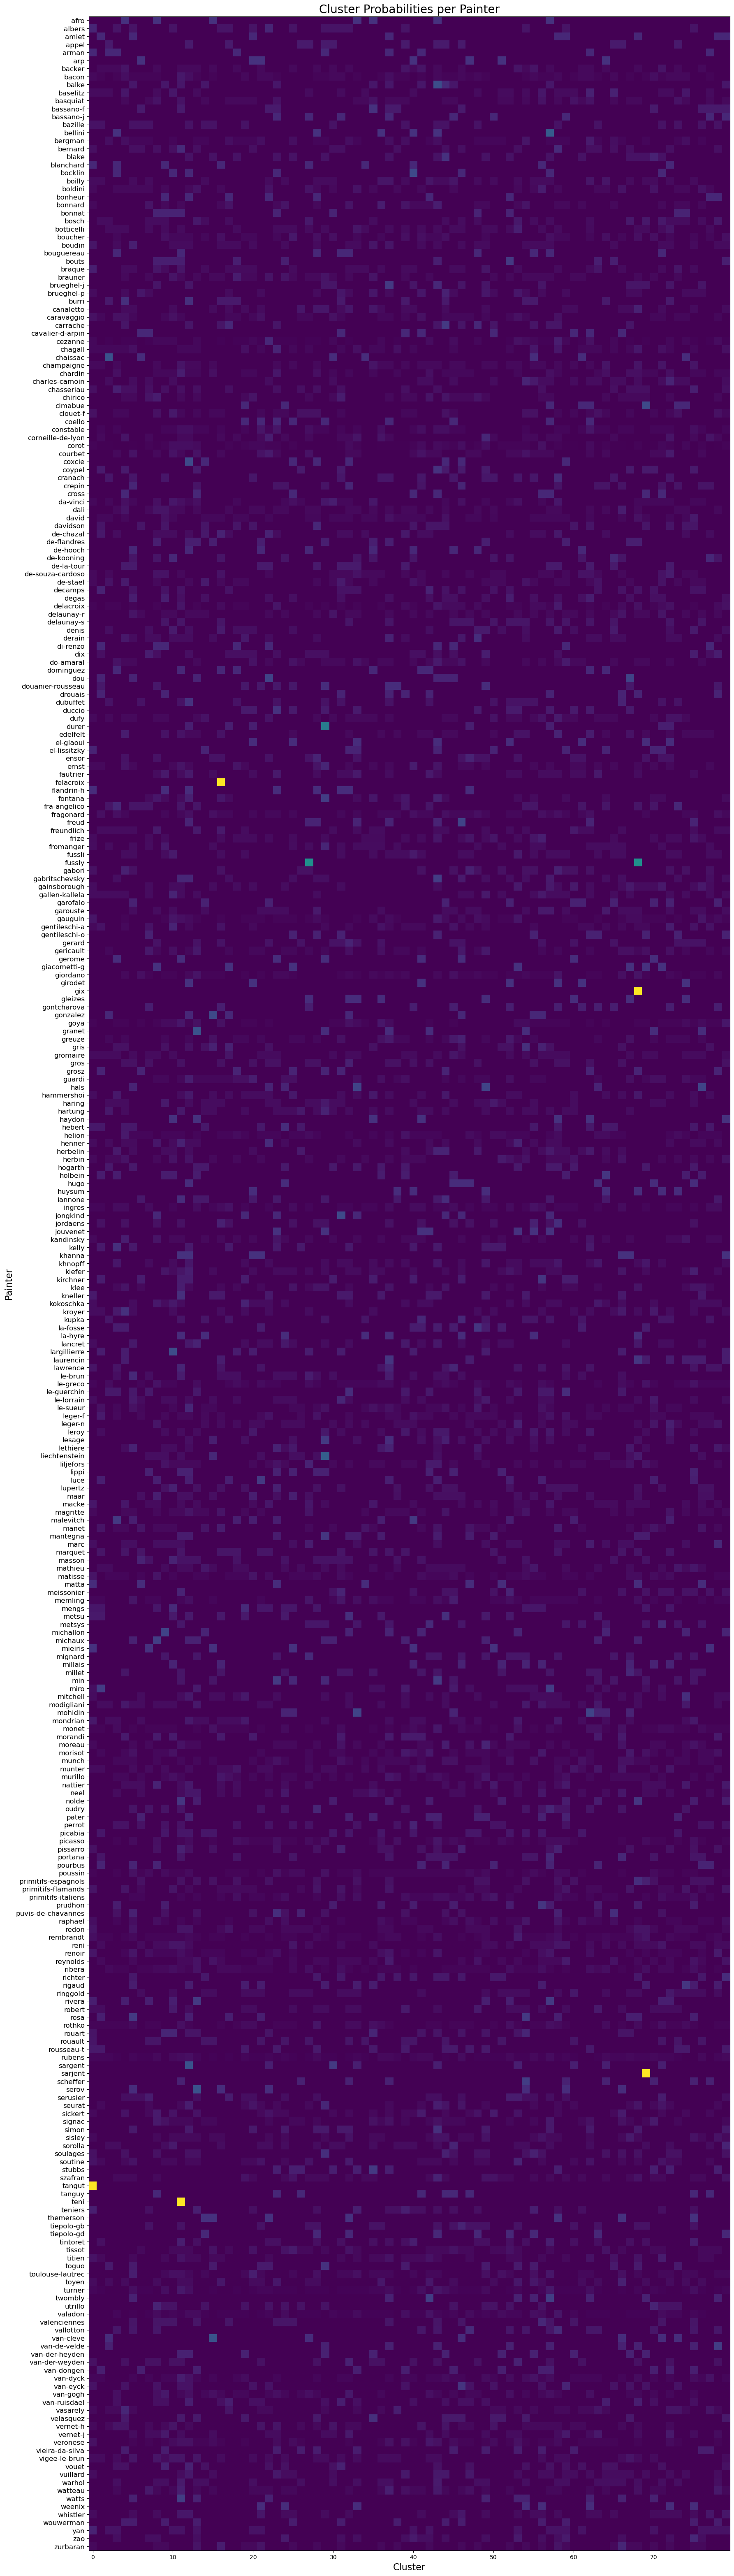

In [28]:
plt.figure(figsize=(40, 80))
plt.yticks(ticks=np.arange(len(painters)), labels=painters, fontsize=12)
plt.xlabel("Cluster", fontsize=16)
plt.ylabel("Painter", fontsize=16)
plt.title("Cluster Probabilities per Painter", fontsize=20)
plt.imshow(painter_prob_glob)
plt.show()

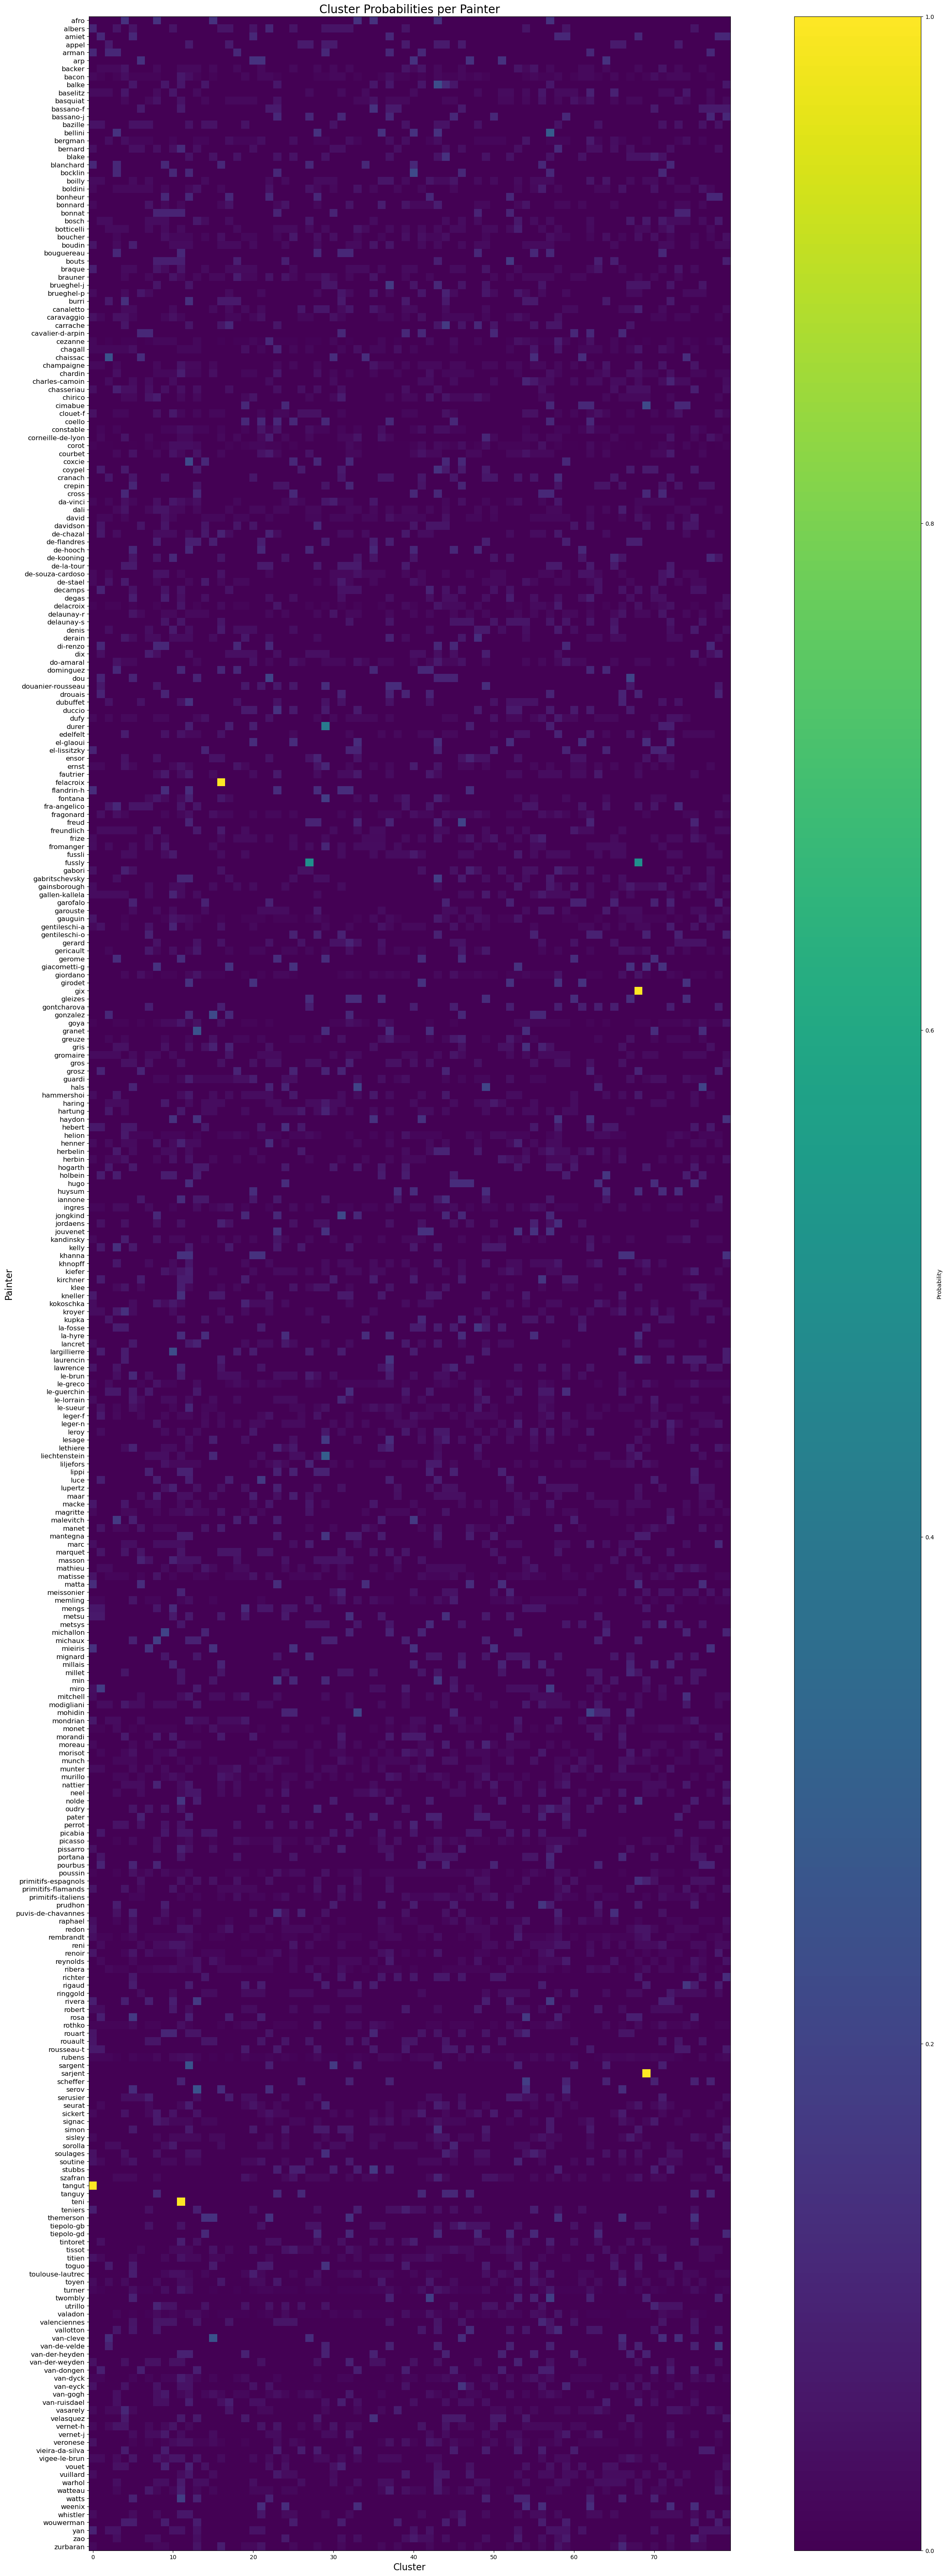

In [ ]:
plt.figure(figsize=(40, 80))
plt.yticks(ticks=np.arange(len(painters)), labels=painters, fontsize=12)
plt.xlabel("Cluster", fontsize=16)
plt.ylabel("Painter", fontsize=16)
plt.title("Cluster Probabilities per Painter", fontsize=20)
plt.imshow(painter_prob)
plt.show()